In [2]:
# 导入相关包
import numpy as np
import pandas as pd

In [3]:
iris_df = pd.read_csv("iris.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
ab_df = pd.read_csv("abalone.txt", sep='\t', header=None)
ab_df

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


|Name|Description|      
|:--:|:--:|      
|Gender|性别，1为Male、-1为Femel、0为infant|      
|Length|最长外壳尺寸|	      
|Diameter|垂直于长度的直径|	      
|Height|带壳肉的高度|    
|Whole weight|整体重量|
|Shucked weight|脱壳重量|
|Viscera weight|内脏的重量|
|Shell weight|壳的重量|
|Rings|（年轮）年龄|

In [5]:
#修改数据集列名称
ab_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [6]:
ab_df.columns = ['Gender', 'Length', 
                 'Diameter', 'Height', 
                 'Whole weight', 'Shucked weight', 
                 'Viscera weight', 'Shell weight',
                 'Rings']

In [7]:
#查看修改结果
ab_df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
ab_df.to_csv('abalone.csv', index=False)

简单线性回归的模型表达式为$$y = wx + b$$其中x表示自变量，即数据集特征，w表示自变量系数，代表每次计算都需要相乘的某个数值，b表示截距项，代表每次计算都需要相加的某个数值，而y表示因变量，即模型输出结果。

     
`多元线性回归`用于解决包含多个特征的回归类问题，模型基本表达式为：$$y = w_1x_1+w_2x+...+w_nx_n+b$$其中$x_{1...n}$表示n个自变量，对应数据集的n个特征，$w_{1...n}$表示n个自变量的系数，b表示截距。此处“加权求和汇总”的计算过程较为明显，简单线性回归也是多元线性回归的一个特例。      
`多项式回归`则是在多元线性回归基础上，允许自变量最高次项超过1次，例如：$$y = w_1x_1^2+w_2x_2+b$$

- 模型评估指标与损失函数

&emsp;&emsp;所谓残差平方和，指的是模型预测值$\hat y$和真实值$y$之间的差值的平方和，计算结果表示预测值和真实值之间的差距，结果越小表示二者差距越小，模型效果越好。SSE基本计算公式为$$SSE = \sum_{i=1}^{n}(\hat y_i-y_i)^2$$

其中n为样本数量。对应的，上述两组不同参数取值对应的模型残差平方和计算结果依次为：

$$SSE_{(1,-1)} = (0-2)^2+(2-4)^2 = 8$$
$$SSE_{(1,0)} = (1-2)^2+(3-4)^2 = 2$$

- 损失函数（Loss Function）

$$SSELoss(w, b) = (y_1 - ŷ_1)^2 + (y_2 - ŷ_2)^2 = (2 - w - b)^2 + (4 - 3w - b)^2$$

SSELoss的基本计算过程和SSE一致，只不过SSELoss中带入的是模型参数，而SSE带入的是确定参数值之后的计算结果，因此我们也可以认为对于SSELoss和SSE来说，一个是带参数的方程，一个是确定方程参数之后的计算结果。

&emsp;&emsp;既然SSE和SSELoss的计算过程类似，那为何要区别损失函数和模型评估指标呢？主要有以下几点原因：      
其一：对于很多模型（尤其是分类模型）来说，模型评估指标和模型损失函数的计算过程并不一致，例如准确率就很难转化为一个以参数为变量的函数表达式；      
其二：模型评估指标和损失函数构建的目标不同，模型评估指标的计算目标是给模型性能一个标量计算结果，而损失函数的构建则是为了找到一组最优的参数结果。

> 除了SSE以外，常用的回归类问题的评估指标还有MSE（均方误差）和RMSE（均方根误差），其中MSE就是在SSE的基础上除以样本总量：
$$MSE = \frac{1}{n}SSE = \frac{1}{n}\sum_{i=1}^{n}(\hat y_i-y_i)^2$$
而RMSE则是在MSE基础之上开平方算得的结果：
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat y_i-y_i)^2}$$
对应的，MSE和RMSE也有相对的损失函数。

- 图形展示损失函数

&emsp;&emsp;为了更好的讨论损失函数（SSELoss）求最小值的过程，对于上述二元损失函数来说，我们可以将其展示在三维空间内：三维空间坐标分别为w、b、SSELoss。此处我们可以使用Python中matplotlib包和Axes3D函数进行三维图像绘制

$$SSELoss(w, b) = (y_1 - ŷ_1)^2 + (y_2 - ŷ_2)^2 = (2 - w - b)^2 + (4 - 3w - b)^2$$

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
x = np.arange(-1,3,0.05)
y = np.arange(-1,3,0.05)
w, b = np.meshgrid(x, y)
SSE = (2 - w - b) ** 2 + (4 - 3 * w - b) ** 2

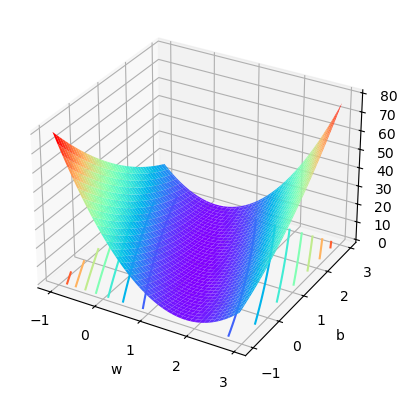

In [11]:
ax = plt.axes(projection='3d')

ax.plot_surface(w, b, SSE, cmap='rainbow')
ax.contour(w, b, SSE, zdir='z', offset=0, cmap="rainbow")  #生成z方向投影，投到x-y平面
plt.xlabel('w')
plt.ylabel('b')
plt.show()

- 函数的凹凸性

&emsp;&emsp;初步探索函数图像，不难看出，目标函数是个整体看起来“向下凸”的函数。从理论出发我们知道，函数的凹凸性是函数的重要性质，也是涉及到损失函数求解方法选取的重要性质。这里我们首先给出凸函数的一般定义，对于任意一个函数，如果函数f(x)上存在任意两个点，$x_1, x_2$，且      
$$ \frac{f(x_1) + f(x_2)}{2} >= f(\frac{x_1 + x_2}{2}) $$    
我们就判定，这个函数是凸函数。 

典型的凸函数如$y = x^2$，我们可以绘制函数图像如下：

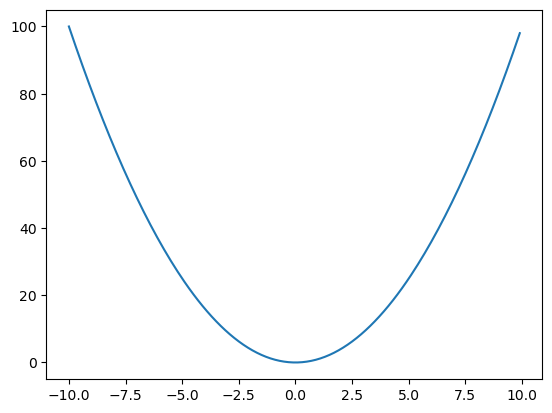

In [12]:
x = np.arange(-10,10,0.1)
y = x ** 2
plt.plot(x, y, '-')
plt.show()

In [10]:
# 函数值的均值
# x1 = 1, x2 = 3
(1 ** 2 + 3 ** 2)/2

5.0

In [11]:
# 均值的函数值
# x1 = 1, x2 = 3
((1+3)/2) ** 2

4.0

- 最小二乘法理论基础

&emsp;&emsp;我们先抛开公式、从一个简单的角度理解最小二乘法。      
&emsp;&emsp;通过上例，也就是$ y = x^2 $函数中不难看出，函数全域最小值点为$x=0$点，同时该点对应的函数切线与x轴平行，也就是在最小值点，函数的导数为0。其实这并不难理解，在最小值点左边函数逐渐递减、而在最小值点右边函数逐渐递增，最小值点左右两边函数单调性相反。      
&emsp;&emsp;而这种性质其实可以拓展为凸函数的一个关于求解最小值的一般性质，即：    
（1）对于一元函数，如果存在导数为0的点，则该点就是最小值点；      
（2）对于多元函数，如果存在某一点，使得函数的各个自变量的偏导数都为0，则该点就是最小值点。